# trim_nonpercolating_paths
``trim_nonpercolating_paths`` function is a filter which removes all nonpercolating paths between specified locations.

## Import Packages

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage

## Generate Test Image
An image of shape 500 by 500 is generated using the blobs generator. Porosity and blobiness set to 0.55 and 1.5 respectively. The test image is visualized by plotting using matplotlib's ``imshow``.

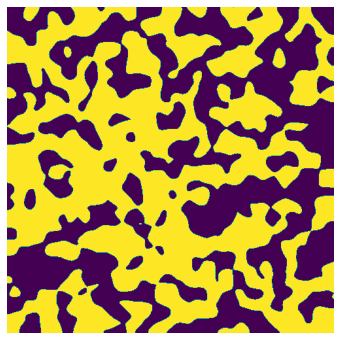

In [2]:
im = ps.generators.blobs(shape=[500, 500], porosity=0.55, blobiness=1.5)

plt.figure(figsize=[6, 6]);
plt.axis(False);
plt.imshow(im);

## Apply filter
Inlets and outlets must be specified before applying the ``trim_nonpercolating_paths`` filter. This trims not only isolated blobs in the middle but also those touching edges but not spanning the domain.

In [3]:
inlets = np.zeros_like(im)
inlets[0, :] = True
outlets = np.zeros_like(im)
outlets[-1, :] = True

Next the filter is applied to the test image using specified inlets and outlets. The resulting image with nonpercolating paths removed is visualized. Also shown, in the image on the right, are the nonpercolating paths in green that were removed.

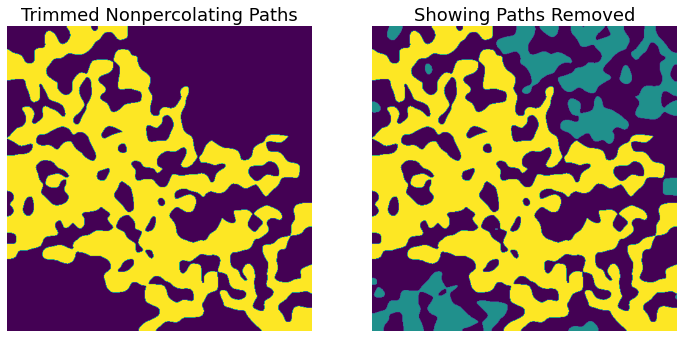

In [4]:
x = ps.filters.trim_nonpercolating_paths(im=im, inlets=inlets, outlets=outlets)

fig, ax = plt.subplots(1, 2, figsize=[12, 12]);
ax[0].imshow(x);
ax[0].set_title('Trimmed Nonpercolating Paths', fontdict={'fontsize': 18});
ax[0].axis(False);
ax[1].imshow(x + (im != x)*0.5);
ax[1].set_title('Showing Paths Removed', fontdict={'fontsize': 18});
ax[1].axis(False);